# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [3]:
# Load the dataset
df = pd.read_csv('Employee_data.csv')

In [4]:
# Check the first few entries
df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [5]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [6]:
# Inspect the different columns in the dataset
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [7]:
# Check the summary of the dataset
df.describe()

Employee ID           Age  Years at Company  Monthly Income  \
count  74610.000000  74610.000000      74610.000000    74610.000000   
mean   37246.028696     38.529379         15.722638     7344.931417   
std    21505.785344     12.082299         11.224059     2596.373589   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18624.250000     28.000000          7.000000     5652.000000   
50%    37239.500000     39.000000         13.000000     7348.500000   
75%    55871.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    50030.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74610.000000        72698.000000          74610.000000   
mean               0.832958           49.990839              1.657432   
std                0.995326           28.519135              1.579862   
min                0.000000            1.000000              0.000000   
25%                0.000000           25.000000              0.000000   
50%                1.000000           50.000000              1.000000   
75%                2.000000           75.000000              3.000000   
max                4.000000           99.000000             15.000000   

       Company Tenure (In Months)  
count                72197.000000  
mean                    55.711899  
std                     25.392325  
min                      2.000000  
25%                     36.000000  
50%                     56.000000  
75%                     76.000000  
max                    128.000000

### **1.3 Check the data type of columns**

In [8]:
# Check the info to see the types of the feature variables and the null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

In [9]:
df.dtypes.value_counts()

object     16
int64       6
float64     2
Name: count, dtype: int64

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [10]:
# Check the number of missing values in each column
df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [11]:
# Check the percentage of missing values in each column in ascending order

df.isnull().sum().sort_values(ascending=True) / len(df) * 100

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Education Level               0.000000
Number of Dependents          0.000000
Marital Status                0.000000
Job Level                     0.000000
Company Size                  0.000000
Employee Recognition          0.000000
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Attrition                     0.000000
Company Reputation            0.000000
Distance from Home            2.562659
Company Tenure (In Months)    3.234151
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [12]:
# Handle the missing value rows in the column
# Fill missing values with the median
df['Distance from Home'] = df['Distance from Home'].fillna(df['Distance from Home'].median())
df['Company Tenure (In Months)'] = df['Company Tenure (In Months)'].fillna(df['Company Tenure (In Months)'].median())


2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [13]:

df.isnull().sum().sort_values(ascending=True) / len(df) * 100

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64

In [14]:
# Check the percentage of remaining data after missing values are removed
remainingdata = (len(df) - df.isnull().sum().sum()) / len(df) * 100
print(f"Percentage of remaining data after missing values are removed: {remainingdata:.2f}%")

Percentage of remaining data after missing values are removed: 100.00%


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [15]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def display_cat_col(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f"{col}: {df[col].unique()}")
            print(f"Number of unique values: {df[col].nunique()}")
            print()



In [16]:
# Check the data
display_cat_col(df)

Gender: ['Male' 'Female']
Number of unique values: 2

Job Role: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Number of unique values: 5

Work-Life Balance: ['Excellent' 'Poor' 'Good' 'Fair']
Number of unique values: 4

Job Satisfaction: ['Medium' 'High' 'Very High' 'Low']
Number of unique values: 4

Performance Rating: ['Average' 'Low' 'High' 'Below Average']
Number of unique values: 4

Overtime: ['No' 'Yes']
Number of unique values: 2

Education Level: ['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
Number of unique values: 5

Marital Status: ['Married' 'Divorced' 'Single']
Number of unique values: 3

Job Level: ['Mid' 'Senior' 'Entry']
Number of unique values: 3

Company Size: ['Medium' 'Small' 'Large']
Number of unique values: 3

Remote Work: ['No' 'Yes']
Number of unique values: 2

Leadership Opportunities: ['No' 'Yes']
Number of unique values: 2

Innovation Opportunities: ['No' 'Yes']
Number of unique values: 2

Company Reputation: 

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [17]:
# Drop redundant columns which are not required for modelling
df = df.drop(['Employee ID', 'Employee Name'], axis=1, errors= 'ignore')


In [18]:
# Check first few rows of data
df.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    Male                19   Education            5390   
1   59  Female                 4       Media            5534   
2   24  Female                10  Healthcare            8159   
3   36  Female                 7   Education            3989   
4   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  ...  Number of Dependents Job Level Company Size  \
0       No  ...                     0       Mid       Medium   
1       No  ...                     3       Mid       Medium   
2       No  ...                     3       Mid       Medium   
3       No  ...                     2       Mid        Small   
4      Yes  ...                     0    Senior       Medium   

   Company Tenure (In Months) Remote Work Leadership Opportunities  \
0                        89.0          No                       No   
1                        21.0          No                       No   
2                        74.0          No                       No   
3                        50.0         Yes                       No   
4                        68.0          No                       No   

   Innovation Opportunities Company Reputation Employee Recognition Attrition  
0                        No          Excellent               Medium    Stayed  
1                        No               Fair                  Low    Stayed  
2                        No               Poor                  Low    Stayed  
3                        No               Good               Medium    Stayed  
4                        No               Fair               Medium    Stayed  

[5 rows x 23 columns]

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [19]:
# Import Train Test Split
import sklearn
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [20]:
# Put all the feature variables in X
X = df.drop('Attrition', axis=1)

# Put the target variable in y
y = df['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [21]:
# Split the data into 70% train data and 30% validation data
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
print("Training Set:", X_train.shape)
print("Validation Set:", X_validation.shape)

Training Set: (52227, 22)
Validation Set: (22383, 22)


In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52227 entries, 67016 to 15795
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         52227 non-null  int64  
 1   Gender                      52227 non-null  object 
 2   Years at Company            52227 non-null  int64  
 3   Job Role                    52227 non-null  object 
 4   Monthly Income              52227 non-null  int64  
 5   Work-Life Balance           52227 non-null  object 
 6   Job Satisfaction            52227 non-null  object 
 7   Performance Rating          52227 non-null  object 
 8   Number of Promotions        52227 non-null  int64  
 9   Overtime                    52227 non-null  object 
 10  Distance from Home          52227 non-null  float64
 11  Education Level             52227 non-null  object 
 12  Marital Status              52227 non-null  object 
 13  Number of Dependents        5222

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [24]:
# Select numerical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols

['Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Company Tenure (In Months)']

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

In [25]:


# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt


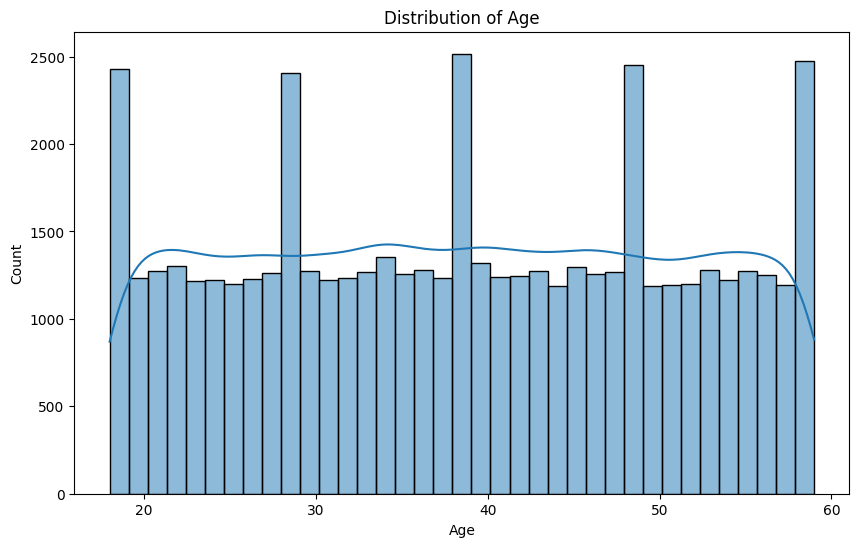

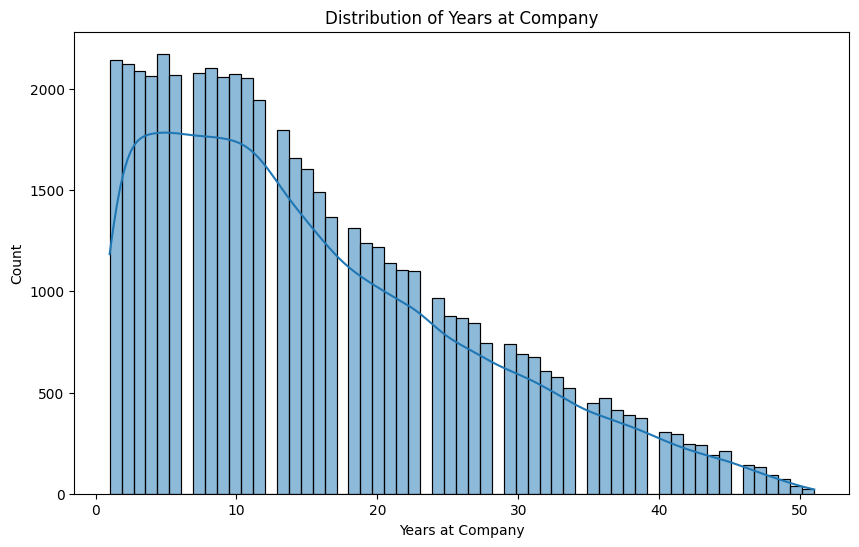

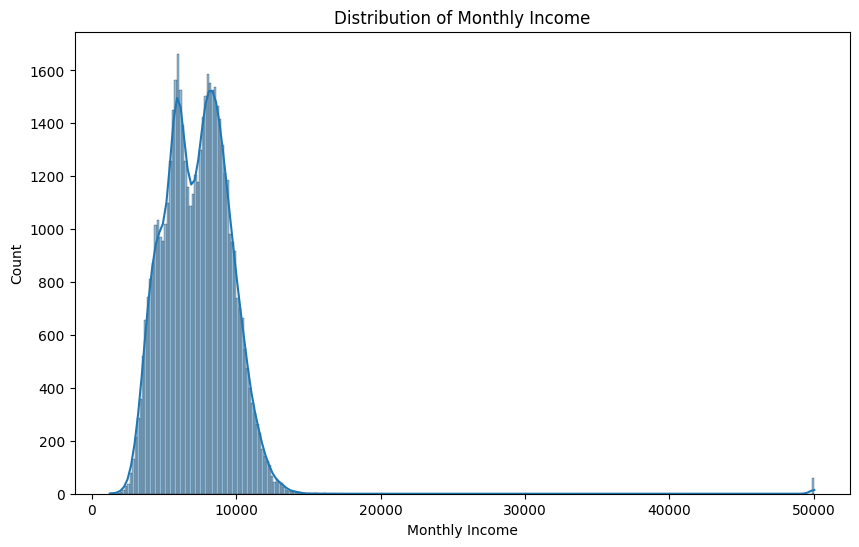

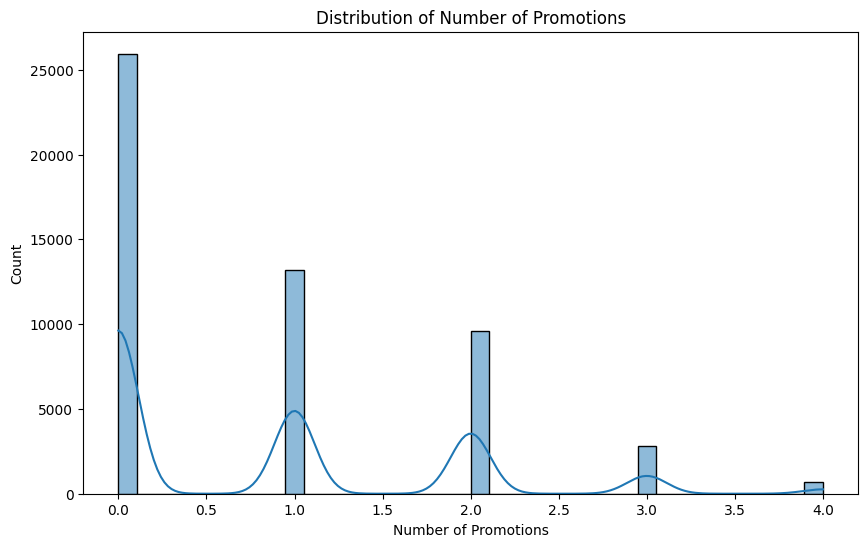

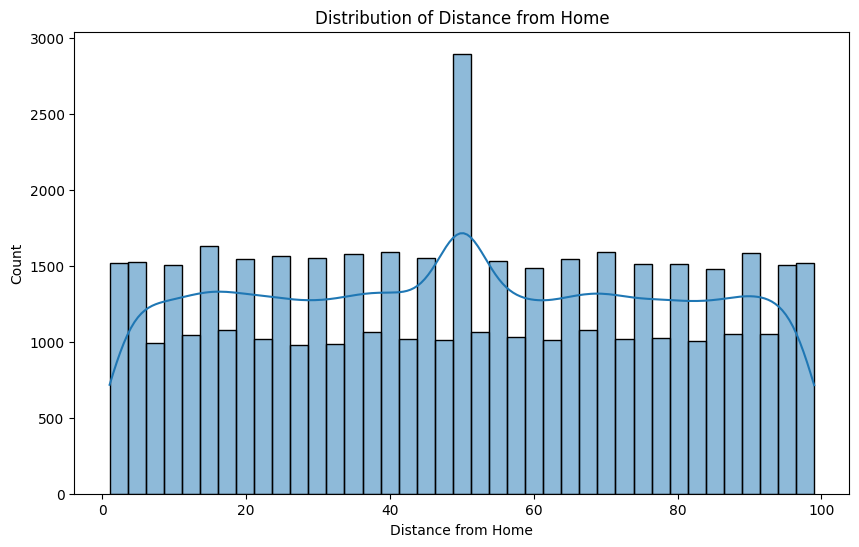

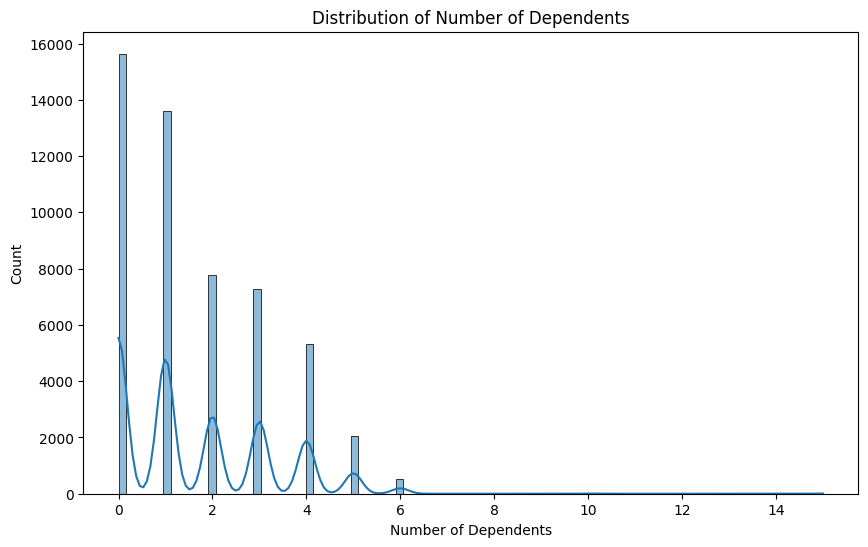

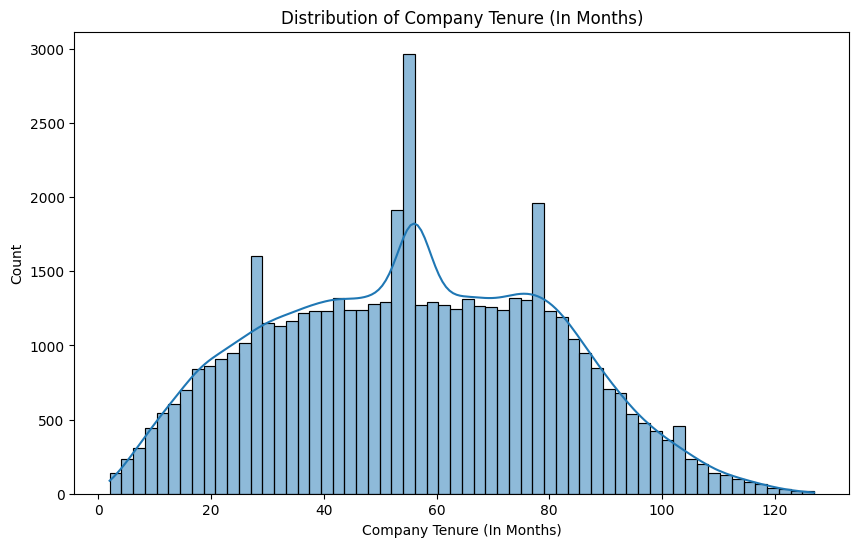

In [26]:
# Plot all the numerical columns to understand their distribution
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

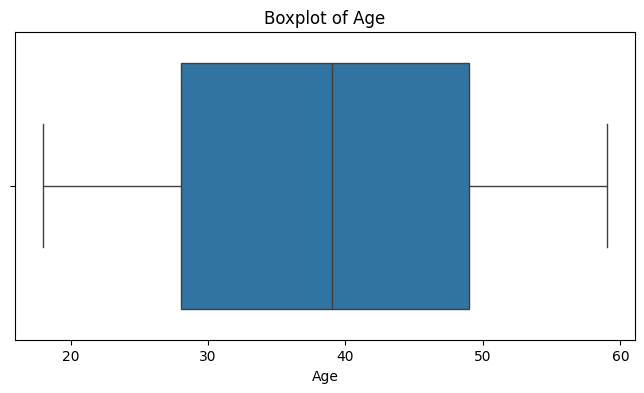

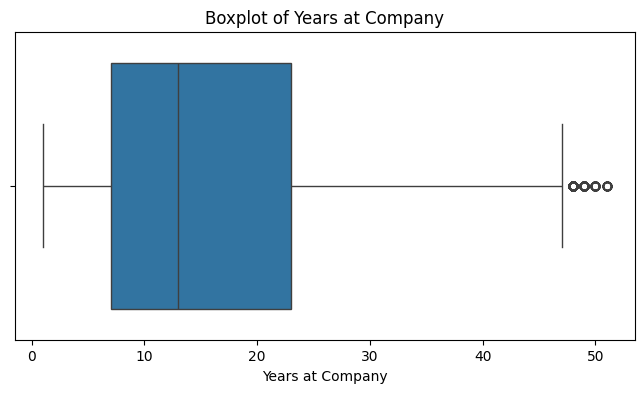

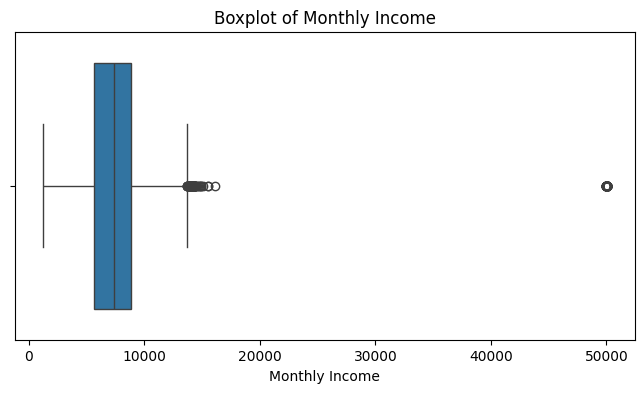

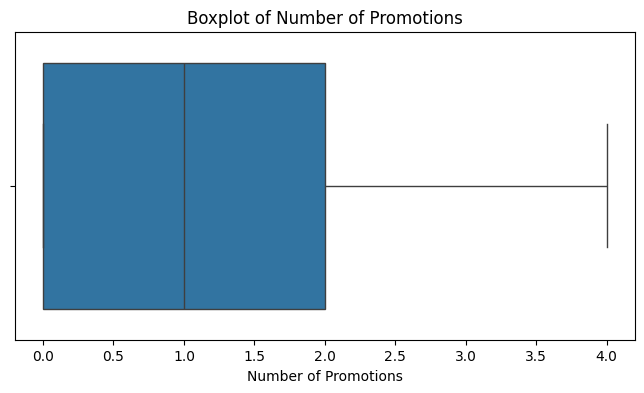

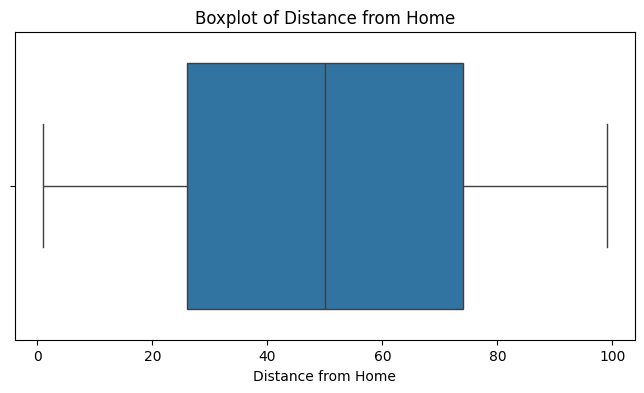

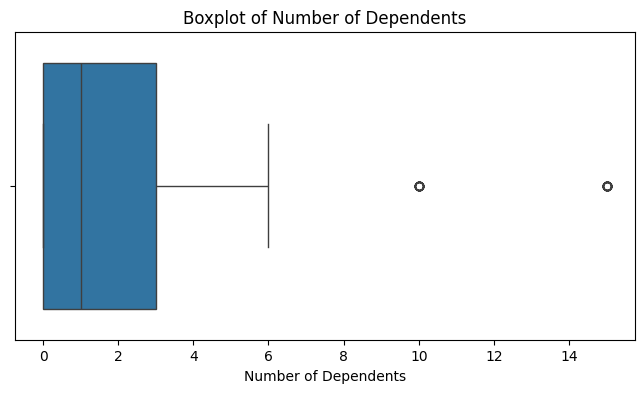

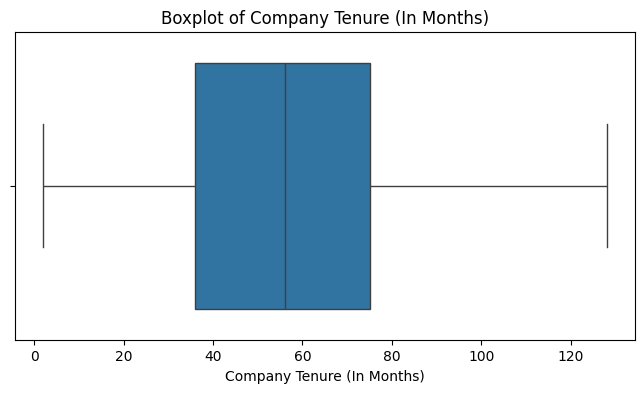

In [27]:

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


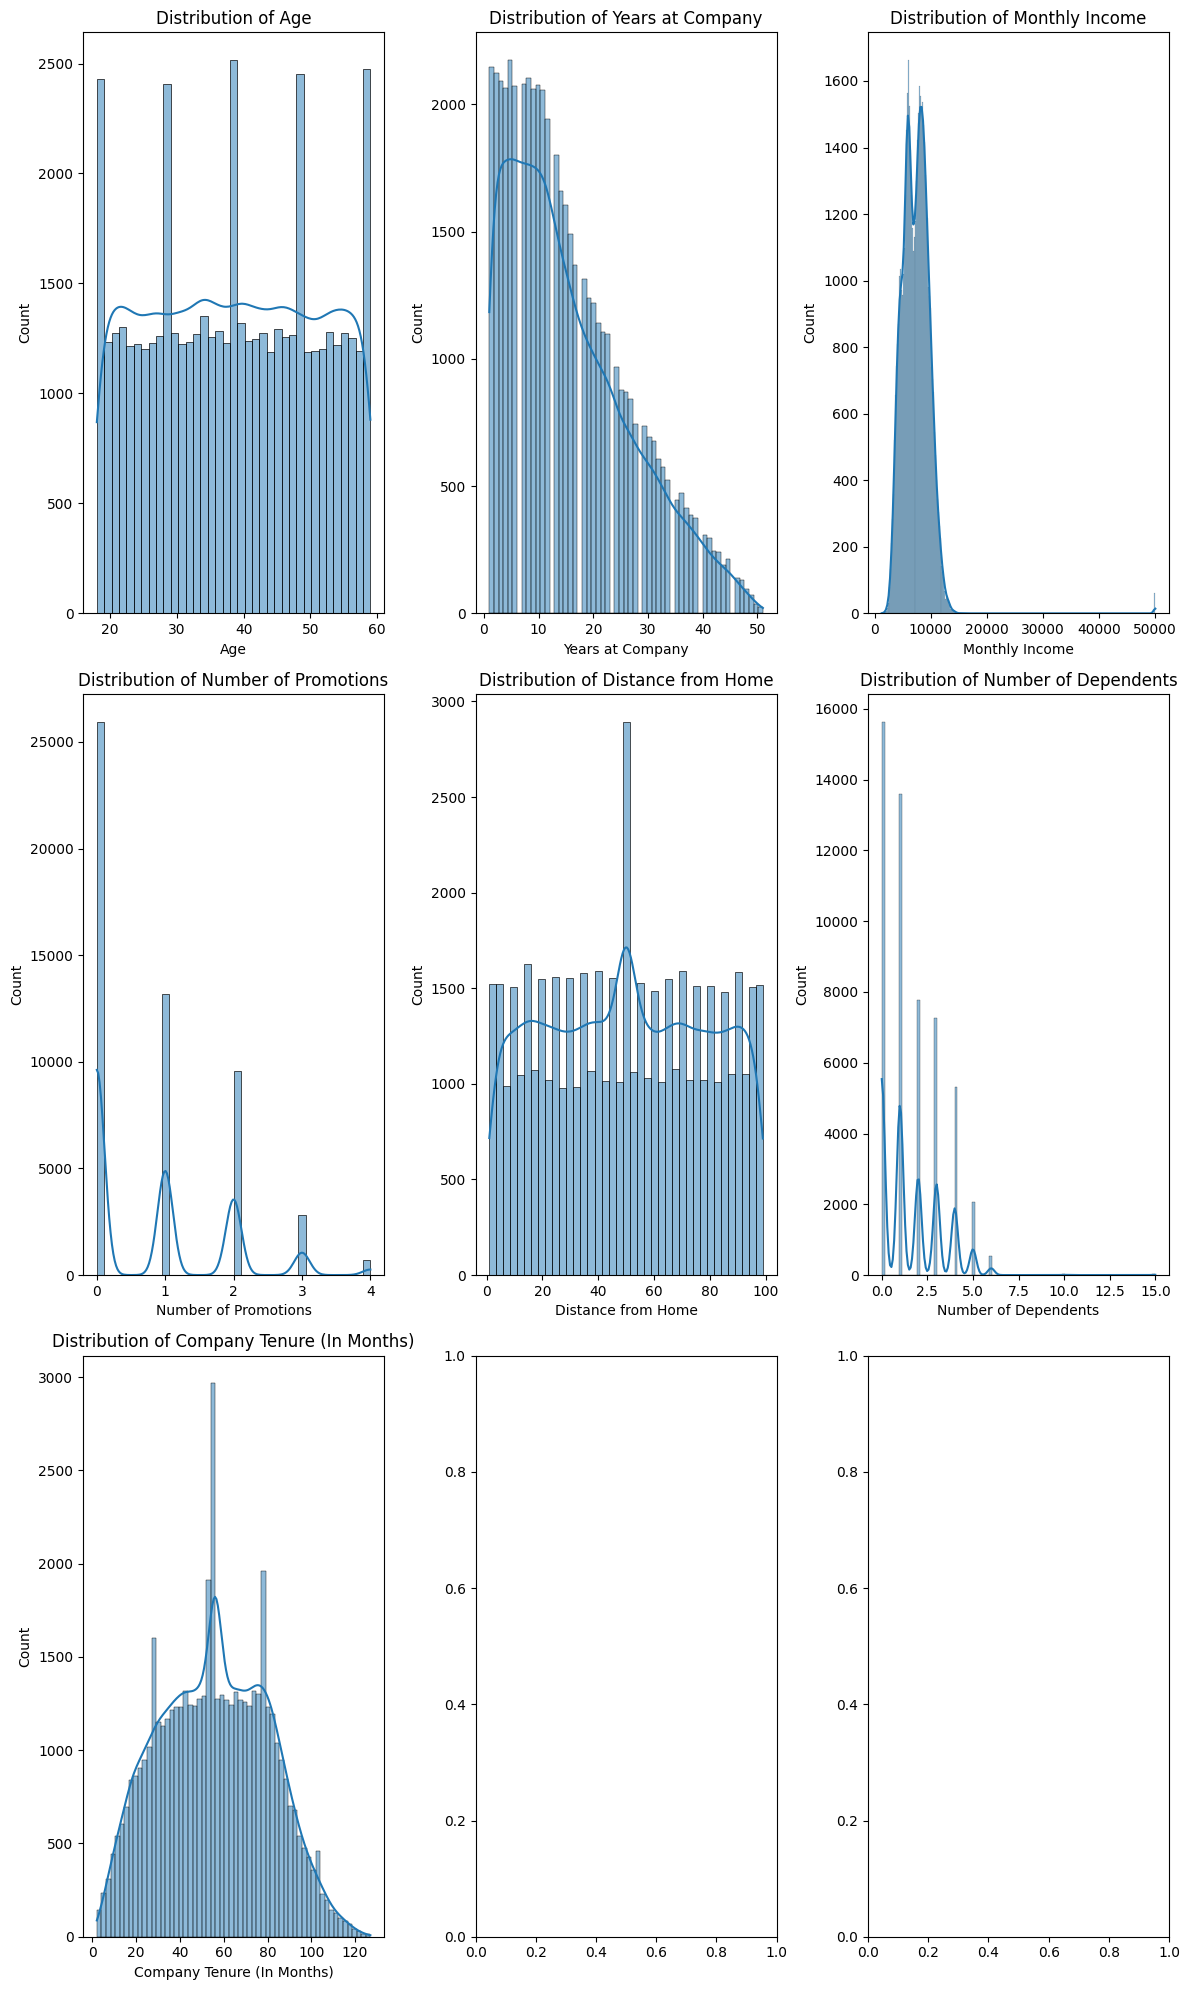

In [30]:
# perform subplots for all the numerical columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 20))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(X_train[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", center = 0.8)
plt.title("Correlation Matrix")
plt.show()


### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

In [ ]:
# Create correlation matrix for numerical columns
corr_matrix = df[num_cols].corr()

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center = 0.8)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
corr_matrix_X_train = X_train[num_cols].corr()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_X_train, annot=True, cmap='coolwarm', fmt=".2f", center = 0.8)
plt.title("Correlation Matrix")
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

In [ ]:
# Plot a bar chart to check class balance
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train)
plt.title('Class Balance')
plt.show()


### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

In [ ]:
# Plot distribution for each categorical column with target variable
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
cat_cols

In [ ]:
# Plot distribution for each categorical column with target variable using counterplot
for col in cat_cols:
    plt.figure(figsize=(8, 4))

    sns.countplot(x=X_train[col], hue=df['Attrition'])
    plt.title(f'Distribution of {col} by Attrition')
    plt.show()

In [ ]:
# create subplots each categorical column with target variable
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 20))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=X_train[col], hue=df['Attrition'], ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Attrition')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Attrition', loc='upper right')

plt.tight_layout()
plt.show()



In [ ]:
# Boxplots to show distribution of numeric features against Attrition
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df['Attrition'], y=X_train[col])
    plt.title(f'Distribution of {col} by Attrition')
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [ ]:
# Select numerical columns
num_cols_X_validation = X_validation.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols_X_validation

5.1.2 Plot distribution of numerical columns

In [ ]:
# Plot all the numerical columns to understand their distribution
plt.figure(figsize=(10, 6))
sns.histplot(X_validation[col], kde=True)
plt.title(f'Distribution of {col}')
plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

In [ ]:
# Create correlation matrix for numerical columns
corr_matrix_X_validation = X_validation[num_cols_X_validation].corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_X_validation, annot=True, cmap='coolwarm', fmt=".2f", center = 0.8)
plt.title("Correlation Matrix")
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [ ]:
# Plot a bar chart to check class balance
plt.figure(figsize=(8, 4))
sns.countplot(x=y_validation)
plt.title('Class Balance')
plt.show()

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

In [ ]:
# Plot distribution for each categorical column with target variable
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=X_validation[col], hue=df['Attrition'])
    plt.title(f'Distribution of {col} by Attrition')
    plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [ ]:
# Check the categorical columns
cat_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()
cat_cols

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for independent columns
df_dummies = pd.get_dummies(X_train[cat_cols], drop_first=True)
df_dummies.head()

In [ ]:
 # Add the results to the master DataFrame
 X_train = pd.concat([X_train, df_dummies], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [ ]:
# Drop the original categorical columns and check the DataFrame
X_train = X_train.drop(cat_cols, axis=1)
X_train.head()

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for independent columns
df_dummies = pd.get_dummies(X_validation[cat_cols], drop_first=True)
df_dummies.head()

# Add the results to the master DataFrame
X_validation = pd.concat([X_validation, df_dummies], axis=1)


Now, drop the original categorical columns and check the DataFrame

In [ ]:

# Drop categorical columns and check the DataFrame
X_validation = X_validation.drop(cat_cols, axis=1)
X_validation.head()

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [ ]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train = pd.DataFrame(y_train)
y_validation = pd.DataFrame(y_validation)

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for dependent column
df_dummies = pd.get_dummies(y_train, drop_first=True)
df_dummies.head()

# Add the results to the master DataFrame
y_train = pd.concat([y_train, df_dummies], axis=1)


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [ ]:
# Create dummy variables using the 'get_dummies' for dependent column
df_dummies = pd.get_dummies(y_validation, drop_first=True)
df_dummies.head()

# Add the results to the master DataFrame
y_validation = pd.concat([y_validation, df_dummies], axis=1)

In [ ]:
y_validation

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [ ]:
# Drop redundant columns from both train and validation
y_train = y_train.drop('Attrition', axis=1)
y_validation = y_validation.drop('Attrition', axis=1)

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [ ]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler



In [ ]:
scaler = StandardScaler()

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [ ]:
# Fit and transform on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation data
X_validation_scaled = scaler.transform(X_validation)


In [ ]:

# Optional: Convert back to DataFrame for compatibility
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_validation = pd.DataFrame(X_validation_scaled, columns=X_validation.columns, index=X_validation.index)

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [ ]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [ ]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [ ]:
# Display the features selected by RFE
selected_features = X_train.columns[rfe.support_]
selected_features


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [ ]:
# Put columns selected by RFE into variable 'col'
col = selected_features
col


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [ ]:
# Select only the columns selected by RFE
X_train = X_train[col]


In [ ]:
# View the training data
X_train.head()

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [ ]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train = sm.add_constant(X_train)


7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [ ]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
model = sm.Logit(y_train, X_train).fit()


In [ ]:
model.summary()


**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [ ]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
# Make a VIF DataFrame for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [ ]:
# Predict the probabilities on the training set
y_train_pred = model.predict(X_train)


7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [ ]:
# Reshape it into an array
y_train_pred = y_train_pred.values.reshape(-1)


7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [ ]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
predicted_probability = pd.DataFrame({'Actual': y_train.values.reshape(-1), 'Predicted': y_train_pred})

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [ ]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
predicted_probability['Predicted'] = predicted_probability['Predicted'].apply(lambda x: 1 if x > 0.5 else 0)


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [ ]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
accuracy = metrics.accuracy_score(predicted_probability['Actual'], predicted_probability['Predicted'])
accuracy

7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [ ]:
# Create confusion matrix
confusion_matrix = metrics.confusion_matrix(predicted_probability['Actual'], predicted_probability['Predicted'])
confusion_matrix


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [ ]:
# Create variables for true positive, true negative, false positive and false negative
true_positive = confusion_matrix[1, 1]
true_negative = confusion_matrix[0, 0]
false_positive = confusion_matrix[0, 1]
false_negative = confusion_matrix[1, 0]



7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [ ]:
# Calculate sensitivity
sensitivity = true_positive / (true_positive + false_negative)
sensitivity


In [ ]:
# Calculate specificity
specificity = true_negative / (true_negative + false_positive)
specificity

7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [ ]:
# Calculate precision
precision = true_positive / (true_positive + false_positive)
precision


In [ ]:
# Calculate recall
recall = true_positive / (true_positive + false_negative)
recall


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [ ]:
# Define ROC function
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc



In [ ]:
# Call the ROC function
plot_roc_curve(predicted_probability['Actual'], predicted_probability['Predicted'])

In [ ]:
from sklearn.metrics import confusion_matrix

# Helper function to calculate metrics at each threshold
def evaluate_cutoff(y_true, y_prob, thresholds):
    metrics = []
    for cutoff in thresholds:
        y_pred = (y_prob >= cutoff).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        metrics.append((cutoff, sensitivity, specificity, accuracy))
    return pd.DataFrame(metrics, columns=['Cutoff', 'Sensitivity', 'Specificity', 'Accuracy'])


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

thresholds = np.arange(0.1, 0.9, 0.01)
metrics_df = evaluate_cutoff(y_train, y_train_pred, thresholds)

# Plot Sensitivity, Specificity, Accuracy
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Cutoff'], metrics_df['Sensitivity'], label='Sensitivity')
plt.plot(metrics_df['Cutoff'], metrics_df['Specificity'], label='Specificity')
plt.plot(metrics_df['Cutoff'], metrics_df['Accuracy'], label='Accuracy')
plt.xlabel('Probability Cutoff')
plt.ylabel('Score')
plt.title('Optimizing Cutoff')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Find the cutoff where |sensitivity - specificity| is smallest
optimal = metrics_df.iloc[(metrics_df['Sensitivity'] - metrics_df['Specificity']).abs().argmin()]
print("Optimal Cutoff:")
print(optimal)


**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [ ]:
cutoffs = [0.3, 0.4, 0.5, 0.6, 0.7]


In [ ]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
for cutoff in cutoffs:
    predicted_probability[f'Predicted_{cutoff}'] = predicted_probability['Predicted'].apply(lambda x: 1 if x > cutoff else 0)



7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [ ]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
accuracy_cutoffs = []
sensitivity_cutoffs = []
specificity_cutoffs = []


In [ ]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
for cutoff in cutoffs:
    accuracy = metrics.accuracy_score(predicted_probability['Actual'], predicted_probability[f'Predicted_{cutoff}'])
    sensitivity = metrics.recall_score(predicted_probability['Actual'], predicted_probability[f'Predicted_{cutoff}'])
    specificity = metrics.recall_score(predicted_probability['Actual'], predicted_probability[f'Predicted_{cutoff}'], pos_label=0)

    accuracy_cutoffs.append(accuracy)
    sensitivity_cutoffs.append(sensitivity)
    specificity_cutoffs.append(specificity)

    print(f"Cutoff: {cutoff}")
    print(f"Accuracy: {accuracy}")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print()



In [ ]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
plt.figure(figsize=(10, 6))
plt.plot(cutoffs, accuracy_cutoffs, marker='o', label='Accuracy')
plt.plot(cutoffs, sensitivity_cutoffs, marker='o', label='Sensitivity')
plt.plot(cutoffs, specificity_cutoffs, marker='o', label='Specificity')
plt.xlabel('Probability Cutoff')
plt.ylabel('Score')
plt.title('Accuracy, Sensitivity, and Specificity at Different Probability Cutoffs')
plt.legend()
plt.grid(True)
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [ ]:
# Create a column for final prediction based on the optimal cutoff
predicted_probability['Final_Prediction'] = predicted_probability['Predicted_0.5'].apply(lambda x: 1 if x > 0.5 else 0)



7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [ ]:
# Calculate the accuracy
accuracy = metrics.accuracy_score(predicted_probability['Actual'], predicted_probability['Final_Prediction'])
accuracy


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [ ]:
# Create the confusion matrix once again
confusion_matrix = metrics.confusion_matrix(predicted_probability['Actual'], predicted_probability['Final_Prediction'])
confusion_matrix


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [ ]:
# Create variables for true positive, true negative, false positive and false negative
true_positive = confusion_matrix[1, 1]
true_negative = confusion_matrix[0, 0]
false_positive = confusion_matrix[0, 1]
false_negative = confusion_matrix[1, 0]


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [ ]:
# Calculate Sensitivity
sensitivity = true_positive / (true_positive + false_negative)
sensitivity


In [ ]:
# Calculate Specificity
specificity = true_negative / (true_negative + false_positive)
specificity

7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [ ]:
# Calculate Precision
precision = true_positive / (true_positive + false_positive)
precision


In [ ]:
# Calculate Recall
recall = true_positive / (true_positive + false_negative)
recall


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [ ]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [ ]:
# Check actual and predicted values from initial model
predicted_probability.head()


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

In [ ]:
# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(predicted_probability['Actual'], predicted_probability['Predicted'])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [ ]:
# Select the relevant features for validation set
X_validation = X_validation[col]


8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [ ]:
# Add constant to X_validation
X_validation = sm.add_constant(X_validation)


8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [ ]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = model.predict(X_validation)

# View predictions
y_validation_pred


8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [ ]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame({'Actual': y_validation.values.reshape(-1), 'Predicted': y_validation_pred})

# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame({'Actual': y_validation.values.reshape(-1)})

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
actual.reset_index(drop=True, inplace=True)
predicted_probability.reset_index(drop=True, inplace=True)


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [ ]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
predicted_probability['final_prediction'] = predicted_probability['Predicted'].apply(lambda x: 1 if x > 0.5 else 0)

# Check the DataFrame
predicted_probability.head()


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [ ]:
# Calculate the overall accuracy
accuracy = metrics.accuracy_score(predicted_probability['Actual'], predicted_probability['final_prediction'])
accuracy


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [ ]:
# Create confusion matrix
confusion_matrix = metrics.confusion_matrix(predicted_probability['Actual'], predicted_probability['final_prediction'])
confusion_matrix


In [ ]:
# Create variables for true positive, true negative, false positive and false negative
true_positive = confusion_matrix[1, 1]
true_negative = confusion_matrix[0, 0]
false_positive = confusion_matrix[0, 1]
false_negative = confusion_matrix[1, 0]


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [ ]:
# Calculate sensitivity
sensitivity = true_positive / (true_positive + false_negative)
sensitivity


In [ ]:
# Calculate specificity
specificity = true_negative / (true_negative + false_positive)
specificity


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [ ]:
# Calculate precision
precision = true_positive / (true_positive + false_positive)
precision


In [ ]:
# Calculate recall
recall = true_positive / (true_positive + false_negative)
recall


## Conclusion

